In [46]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load datasets
train = pd.read_csv('/content/train_LZdllcl (1).csv')
test = pd.read_csv('/content/test_2umaH9m (1).csv')

In [48]:
#view of data
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [49]:
train.shape

(54808, 14)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [51]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [52]:
train['department'].value_counts()

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [53]:
train['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


In [54]:
train['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


In [55]:
train['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


In [56]:
#copying train to traindata
traindata = train.copy()

In [57]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [58]:
#copying test to testdata
testdata = test.copy()

preprocessing on traindata

In [59]:
#checking duplication
traindata.duplicated().sum()

0

In [60]:
#checking for missing values
traindata.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [61]:
traindata['education'].mode()

,education
0,Bachelor's


In [62]:
# Impute 'education' column with mode value
traindata['education'] = traindata['education'].fillna(traindata['education'].mode()[0])

# Impute 'previous_year_rating',gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted column with median value
traindata['previous_year_rating'] = traindata['previous_year_rating'].fillna(traindata['previous_year_rating'].median())
traindata['region'] = traindata['region'].fillna(traindata['region'].mode()[0])
traindata['gender'] = traindata['gender'].fillna(traindata['gender'].mode()[0])
traindata['recruitment_channel'] = traindata['recruitment_channel'].fillna(traindata['recruitment_channel'].mode()[0])
traindata['no_of_trainings'] =  traindata['no_of_trainings'].fillna(traindata['no_of_trainings'].mode()[0])
traindata['age'] = traindata['age'].fillna(traindata['age'].mode()[0])



In [63]:
traindata.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [64]:
#impute length_of_service	,KPIs_met >80%,awards_won?,avg_training_score	,is_promoted with median values
traindata['length_of_service'] = traindata['length_of_service'].fillna(traindata['length_of_service'].median())
traindata['KPIs_met >80%'] = traindata['KPIs_met >80%'].fillna(traindata['KPIs_met >80%'].median())
traindata['awards_won?'] = traindata['awards_won?'].fillna(traindata['awards_won?'].median())
traindata['avg_training_score'] = traindata['avg_training_score'].fillna(traindata['avg_training_score'].median())
traindata['is_promoted'] = traindata['is_promoted'].fillna(traindata['is_promoted'].median())

<Axes: >

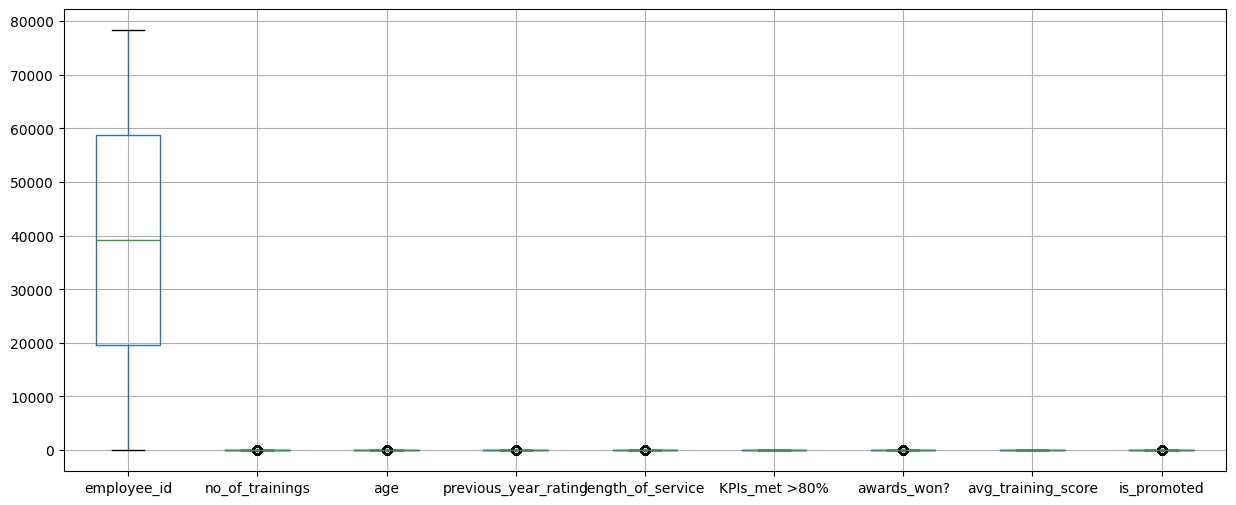

In [65]:
#boxplot for traindata
plt.figure(figsize=(15,6))
traindata.boxplot()

In [66]:
#outliers showing in boxplot are not cosidering because it is meaningful.
#droping employeeid it has no meaning in processing
traindata.drop('employee_id',axis=1,inplace=True)

In [67]:
traindata.columns



Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

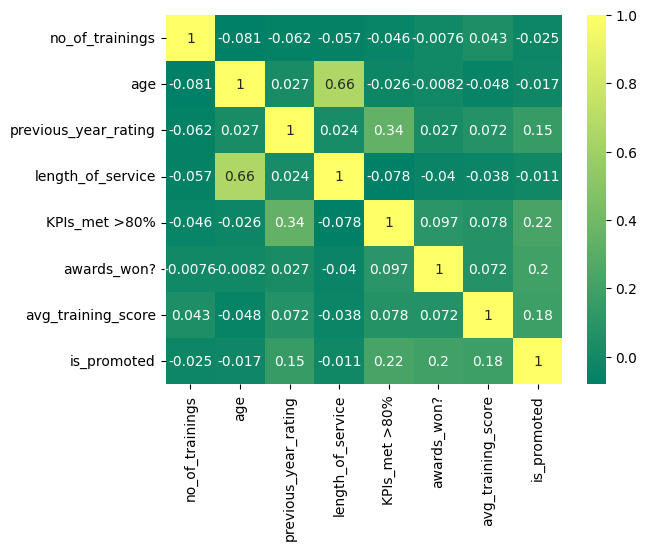

In [68]:
# heatmap for numeric types
numerical_columns = traindata.select_dtypes(include=['number']).columns
corr = traindata[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='summer');

from the above heatmap clear that avg training score,awards won,kpis met>80% & previous year rating are more correlated with target column(promoted or not).
similarly age and length of service are correlated each other this may leads to multicollinearity.may drop either.

Encoding


In [69]:
#label encoding for department,region,education,gender,recriutment channel
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
traindata['department'] = le.fit_transform(traindata['department'])
traindata['region'] = le.fit_transform(traindata['region'])
traindata['education'] = le.fit_transform(traindata['education'])
traindata['gender'] = le.fit_transform(traindata['gender'])
traindata['recruitment_channel'] = le.fit_transform(traindata['recruitment_channel'])

In [70]:
traindata.dtypes

,0
department,int64
region,int64
education,int64
gender,int64
recruitment_channel,int64
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


encoding completed.outliers are not checking and removing


In [71]:
#copying test to testdata
testdata = test.copy()

Preprocessing of testdata

In [72]:
#check duplication
testdata.duplicated().sum()

0

In [73]:
#check null values
testdata.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [74]:
# Impute 'education' column with mode value
testdata['education'] = testdata['education'].fillna(testdata['education'].mode()[0])

# Impute 'previous_year_rating' column with median value
testdata['previous_year_rating'] = testdata['previous_year_rating'].fillna(testdata['previous_year_rating'].median())


In [75]:
testdata.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [76]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [77]:
#label encoding for department,region,education,gender,recriutment channel
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
traindata['department'] = le.fit_transform(traindata['department'])
traindata['region'] = le.fit_transform(traindata['region'])
traindata['education'] = le.fit_transform(traindata['education'])
traindata['gender'] = le.fit_transform(traindata['gender'])
traindata['recruitment_channel'] = le.fit_transform(traindata['recruitment_channel'])

In [78]:
testdata.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


CLASSIFICATION MODELS

1.Logistic Regression

In [79]:
#libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [81]:
#split train and test
x = traindata.drop('is_promoted',axis=1)
y = traindata['is_promoted']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
# logistic regression
log = LogisticRegression()


In [83]:
log.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
#predict target values for the test values
y_pred_log = log.predict(x_test)

In [85]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy_log: {accuracy:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred_log)
print(f'F1 Score_log: {f1:.2f}')


Confusion Matrix:
 [[9969   85]
 [ 832   76]]
Accuracy_log: 0.92
F1 Score_log: 0.14


In [86]:
#after standard scaling


In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [88]:
model1 = LogisticRegression()
model1.fit(x_train_sc,y_train)

LogisticRegression()

In [89]:
y_pred_log_sc = model1.predict(x_test_sc)

In [90]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_log_sc)
print(f'Accuracy_log_sc: {accuracy:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred_log_sc)
print(f'F1 Score_log_sc: {f1:.2f}')


Accuracy_log_sc: 0.92
F1 Score_log_sc: 0.12


2.KNN MODEL

In [91]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [92]:
metrik_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metrik_k.append(acc)

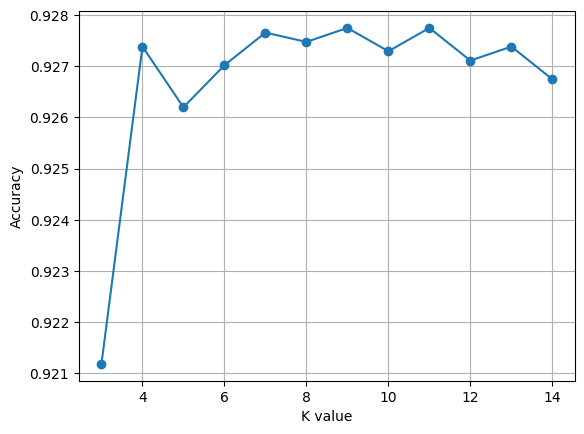

In [93]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

highest accuracy at k=9 so k taken as 9

In [94]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [95]:
y_pred_knn = classifier.predict(x_test)
#print accuracy score and f1 score
print(f'Accuracy_knn: {accuracy_score(y_test,y_pred_knn):.2f}')
print(f'F1 Score_knn: {f1_score(y_test,y_pred_knn):.2f}')


Accuracy_knn: 0.93
F1 Score_knn: 0.25


3.SVM MODEL

In [96]:
#svm model
from sklearn.svm import SVC
#fitting to model
svm = SVC()
svm.fit(x_train,y_train)


SVC()

In [97]:
y_pred_svm = svm.predict(x_test)
#printing accuracy score and f1 score
print("Accuracy Score_svm: ",accuracy_score(y_test,y_pred_svm))
print("F1 Score_svm: ",f1_score(y_test,y_pred_svm))

Accuracy Score_svm:  0.9171683999270206
F1 Score_svm:  0.0


4.NAIVE BAYES ALGORITHM

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
#PRINT F1score and accuracy score
print("Accuracy Score_gnb: ",accuracy_score(y_test,y_pred_gnb))
print("F1 Score_gnb: ",f1_score(y_test,y_pred_gnb))

Accuracy Score_gnb:  0.9151614668856048
F1 Score_gnb:  0.20103092783505155


5.Decision tree classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
y_pred_dtree = clf.predict(x_test)
#print accuracy score and f1 score
print("Accuracy Score_dtree: ",accuracy_score(y_test,y_pred_dtree))
print("F1 Score_dtree: ",f1_score(y_test,y_pred_dtree))

Accuracy Score_dtree:  0.9004743659916074
F1 Score_dtree:  0.4260915307732772


6.Random forest algorithm

In [100]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
#print accuracy score and f1score
print("Accuracy Score_rfc: ",accuracy_score(y_test,y_pred_rfc))
print("F1 Score_rfc: ",f1_score(y_test,y_pred_rfc))
f1_rfc=f1_score(y_test,y_pred_rfc)

Accuracy Score_rfc:  0.9347746761539865
F1 Score_rfc:  0.4153720359771055


In [101]:
f1_log=f1_score(y_test, y_pred_log)
f1_knn=f1_score(y_test, y_pred_knn)
f1_svm=f1_score(y_test, y_pred_svm)
f1_gnb=f1_score(y_test, y_pred_gnb)
f1_dtree=f1_score(y_test, y_pred_dtree)


In [102]:
#list of models and their f1 scores
model_scores = [
    ('Logistic Regression', f1_log),
    ('KNN', f1_knn),
    ('SVM', f1_svm),
    ('Naive Bayes', f1_gnb),
    ('Decision Tree', f1_dtree),
    ('Random Forest', f1_rfc)
]

model_scores

[('Logistic Regression', 0.1421889616463985),
 ('KNN', 0.2514177693761815),
 ('SVM', 0.0),
 ('Naive Bayes', 0.20103092783505155),
 ('Decision Tree', 0.4260915307732772),
 ('Random Forest', 0.4153720359771055)]

Random forest has better f1 value

Crossvalidation and hyperparametertuning


In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cv_res_gnb = cross_val_score(gnb,x,y,cv=5)
cv_res_rfc = cross_val_score(rfc,x,y,cv=5)
cv_res_dtree = cross_val_score(clf,x,y,cv=5)
cv_res_svm = cross_val_score(svm,x,y,cv=5)
cv_res_knn = cross_val_score(knn,x,y,cv=5)

In [105]:
cv_res_gnb
cv_res_rfc
cv_res_dtree
cv_res_svm
cv_res_knn

array([0.92474001, 0.92337165, 0.92145594, 0.92537177, 0.92254356])

Testdata

In [108]:
testdata.sample(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
4456,66357,Analytics,region_2,Bachelor's,m,other,2,29,3.0,3,0,0,84
18355,13676,Operations,region_32,Bachelor's,f,other,2,27,3.0,1,0,0,61
987,47215,Sales & Marketing,region_2,Bachelor's,f,other,2,31,5.0,5,1,0,50
22427,924,Technology,region_29,Master's & above,f,other,1,31,5.0,7,1,0,84


In [109]:
#label encoding for department,region,education,gender,recriutment channel
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
testdata['department'] = le.fit_transform(testdata['department'])
testdata['region'] = le.fit_transform(testdata['region'])
testdata['education'] = le.fit_transform(testdata['education'])
testdata['gender'] = le.fit_transform(testdata['gender'])
testdata['recruitment_channel'] = le.fit_transform(testdata['recruitment_channel'])

In [110]:
testdata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [112]:
predictions = rfc.predict(testdata.drop('employee_id', axis=1))

fitting best model on test data

In [116]:

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])

# Display a random sample of 5 predictions
predictions_df.sample(5)


,Predicted
1513,0
15294,0
15790,0
16491,0
16574,0


In [117]:
#combine predictions with test data
test_df = pd.concat([testdata, predictions_df], axis=1)
test_df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Predicted
5776,27550,7,11,0,1,0,1,45,5.0,18,1,0,49,0
5839,19854,4,11,0,0,2,1,38,3.0,4,1,0,60,0
18635,27682,7,6,2,1,0,1,47,1.0,23,0,0,46,0
11940,56745,2,23,0,1,0,1,35,2.0,8,1,0,45,0
1286,13742,4,11,0,1,2,1,30,4.0,4,1,0,57,0


In [118]:
test_df.to_csv('predictions.csv', index=False)
from google.colab import files
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>